# Data Loading and Understanding

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.set_option("max_rows", None)
sns.set(style='darkgrid')

In [2]:
train=pd.read_csv('train.csv',encoding = "ISO-8859-1")
test=pd.read_csv('test.csv',encoding = "ISO-8859-1")

In [3]:
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
train.isnull().sum(axis=0)

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

So education we can replace with other category like "Not Specified"

In [9]:
train['education']=train['education'].fillna('Not Specified')

In [10]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

/home/mandheer/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

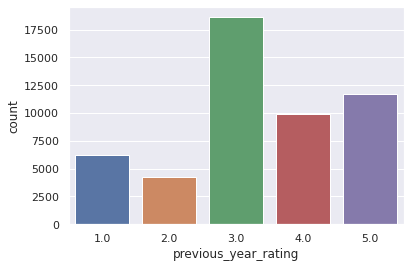

In [11]:
sns.countplot(train['previous_year_rating'])

In [12]:
train['previous_year_rating'].mean()

3.329255780917055

In [13]:
train['previous_year_rating'].median()

3.0

Rating is an important parameter over here so we decided to drop those rows

In [14]:
train['previous_year_rating']=train['previous_year_rating'].fillna(3.0)

In [15]:
train.shape

(54808, 14)

In [16]:
train.isnull().sum(axis=0)

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

No null values

## EDA

In [17]:
train['employee_id'].count()

54808

In [18]:
#dropping employee id cause it is irrelevant to the study
train=train.drop('employee_id',axis=1)

In [19]:
#checking promotion percentage
round(100*train.loc[train['is_promoted']==1,'is_promoted'].count()/len(train.index),3)

8.517

In [20]:
def plot(f):
    plt.xticks(rotation='vertical')
    sns.countplot(x=f,hue='is_promoted',data=train)
    


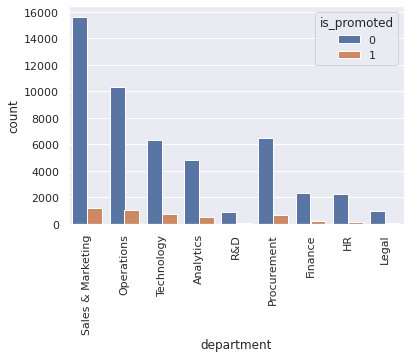

In [21]:
plot('department')


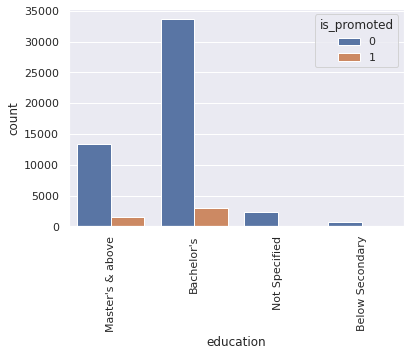

In [22]:
plot('education')

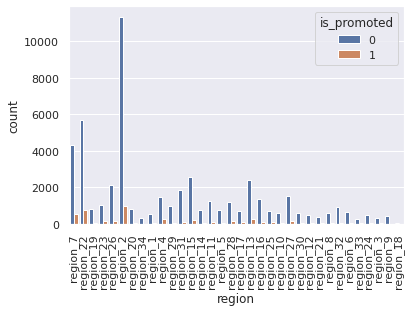

In [23]:
plot('region')

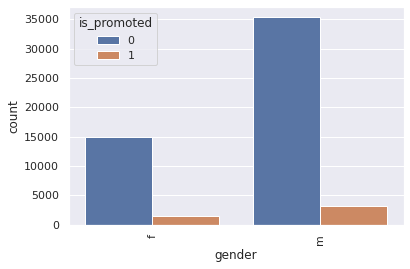

In [24]:
plot('gender')

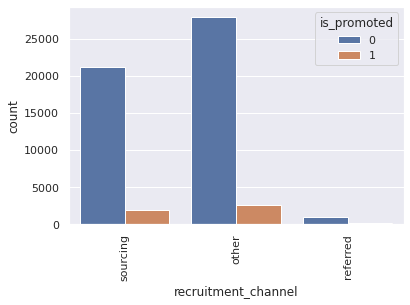

In [25]:
plot('recruitment_channel')

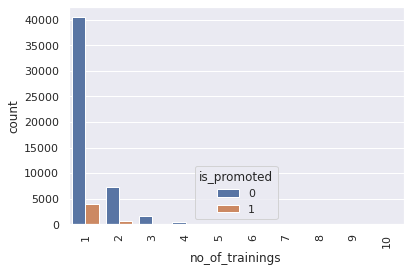

In [26]:
plot('no_of_trainings')

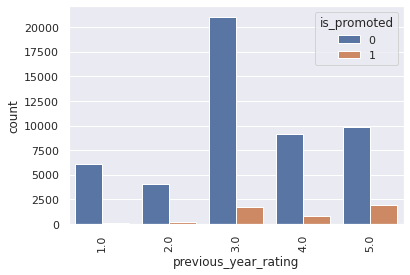

In [27]:
plot('previous_year_rating')

In [28]:
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

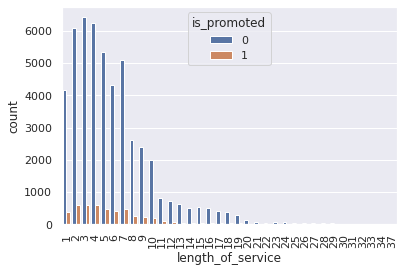

In [29]:
plot('length_of_service')

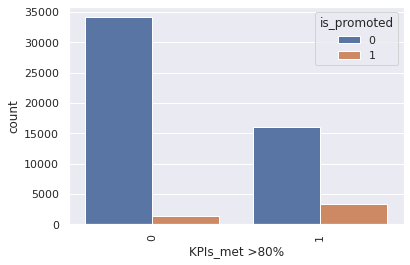

In [30]:
plot('KPIs_met >80%')

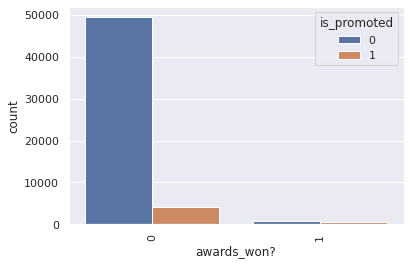

In [31]:
plot('awards_won?')

/home/mandheer/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_promoted', ylabel='age'>

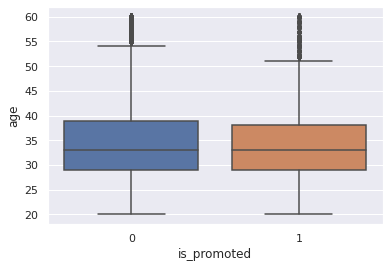

In [32]:
sns.boxplot(train['is_promoted'],train['age'])

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


 ## Preprocessing

In [34]:
#converting gender column in 0 and 1 mapping
train['gender']=train['gender'].map({'f':1,'m':0})

In [35]:
list1=['department','region','education','recruitment_channel']

In [36]:
dummy1=pd.get_dummies(train[list1],drop_first=True)
dummy1.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_Not Specified,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
train=pd.concat([train,dummy1],axis=1)
train.drop(list1,axis=1,inplace=True)

In [38]:
train.shape

(54808, 55)

Rescaling and train test split

In [39]:
y=train.pop('is_promoted')
X=train

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)

In [42]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Model building

In [43]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train) 
  
y_pred = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred)) 

#creating a dataframe to track performance of evry model that we build
performance_dict={}
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#1':['Logistic regression without sampling and with PCA',accuracy,precision,recall,f1score]})

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9988
           1       0.80      0.28      0.41       974

    accuracy                           0.93     10962
   macro avg       0.87      0.64      0.69     10962
weighted avg       0.92      0.93      0.91     10962



In [45]:
print(f1score)

0.4140030441400304


In [46]:
#using oversampling technique to handle class imbalance
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_train,y_train=sm.fit_sample(X_train,y_train.ravel())

In [47]:
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train) 
  
y_pred = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred)) 

accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/(precision+recall)
performance_dict.update({'model#2':['Logistic regression with sampling and PCA',accuracy,precision,recall,f1score]})



              precision    recall  f1-score   support

           0       0.98      0.77      0.86      9988
           1       0.25      0.82      0.39       974

    accuracy                           0.77     10962
   macro avg       0.62      0.79      0.62     10962
weighted avg       0.91      0.77      0.82     10962



# Decision Tree

In [48]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [49]:
# Making predictions
y_pred = dt.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))

accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/(precision+recall)
performance_dict.update({'model#3':['Decision Tree with sampling and PCA without gridsearch',accuracy,precision,recall,f1score]})


              precision    recall  f1-score   support

           0       0.98      0.67      0.80      9988
           1       0.20      0.84      0.32       974

    accuracy                           0.69     10962
   macro avg       0.59      0.75      0.56     10962
weighted avg       0.91      0.69      0.75     10962



In [50]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier


# Running the random forest with default parameters.
rfc_pca = RandomForestClassifier(random_state=57)

# fit
rfc_pca.fit(X_train,y_train)
# Making predictions
y_pred = rfc_pca.predict(X_test)
#Let's check the report of our default model
print(classification_report(y_test,y_pred))

accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#5':['Random Forest with sampling and PCA without gridsearch',accuracy,precision,recall,f1score]})



              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9988
           1       0.63      0.36      0.46       974

    accuracy                           0.92     10962
   macro avg       0.79      0.67      0.71     10962
weighted avg       0.91      0.92      0.92     10962



In [51]:
import xgboost as xgb

# Running the random forest with default parameters.
xg = xgb.XGBClassifier(random_state=42)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)

print(classification_report(y_test,y_pred))
#Let's check the report of our default model
print(classification_report(y_test,y_pred))
accuracy=accuracy_score(y_test, y_pred)
confusion=confusion_matrix(y_test,y_pred)

recall=confusion[1,1]/float(confusion[1,0]+confusion[1,1])
precision=confusion[1,1]/float(confusion[0,1]+confusion[1,1])
f1score=2*precision*recall/float(precision+recall)
performance_dict.update({'model#10':['XGBoost with sampling and PCA ',accuracy,precision,recall,f1score]})

/home/mandheer/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:49:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9988
           1       0.90      0.36      0.51       974

    accuracy                           0.94     10962
   macro avg       0.92      0.68      0.74     10962
weighted avg       0.94      0.94      0.93     10962

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9988
           1       0.90      0.36      0.51       974

    accuracy                           0.94     10962
   macro avg       0.92      0.68      0.74     10962
weighted avg       0.94      0.94      0.93     10962



Test set preprocessing

In [52]:
test.isnull().sum(axis=0)

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [53]:
test['education']=test['education'].fillna('not specified')

In [54]:
test['previous_year_rating']=test['previous_year_rating'].fillna(3.0)

In [56]:
test['gender']=test['gender'].map({'f':1,'m':0})

In [57]:
dummy2=pd.get_dummies(test[list1],drop_first=True)
dummy2.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_not specified,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
test=pd.concat([test,dummy2],axis=1)
test.drop(list1,axis=1,inplace=True)

In [59]:
test.shape

(23490, 55)

In [60]:
test1=test.iloc[:,1:]


In [61]:
test1=scaler.transform(test1)

In [63]:
sample=pd.DataFrame(xg.predict(test1))

In [65]:
sample.columns=['is_promoted']

In [66]:
sample['employee_id']=test['employee_id']

In [67]:
sample.head()

,is_promoted,employee_id
0,0,8724
1,0,74430
2,0,72255
3,0,38562
4,0,64486


In [68]:
sample=sample[['employee_id','is_promoted']]

In [69]:
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [70]:
sample.to_csv('sample.csv',index=False)